# Scaling - Cross Validation - Gridsearch

# Regularization (Ridge, Lasso, ElasticNet)

- Overview
- Multicollinearity
- Feature Scaling
- Ridge Regression Theory
- Lasso Regression Theory
- Elastic-Net
- Cross-Validation and Grid Search

<img src = "reg.png" style = width:600px;height:600px/>

In [3]:
# Doğrusal regresyonda bağımsız değişkenler arasında bir korelasyon varsa multicollinearity(çoklu bağlantı) oluşur.
# Best practice olarak 0.9 un üzerinde ise buna multicollinearity diyebiliriz.

# Bu problemde tahminler kararsız olabilir, model parametreleri için farklı işaretler ve tahminler olabilir.
# model parametreleri olması gerekenden daha büyük olabilir, parametre varyansları olduğundan daha büyük olabilir, 
# verilerdeki çok küçük değişiklikler parametrelerde çok büyük farklılaşmalar gösterebilir.

In [4]:
# Örnegin sahnede üc tane gitarist cok güzel bir meoldide gitar caliyor.
# Ama hangi gitarist in daha iyi gitar caldigini bilmiyoruz. 
# Iste Regularization(düzenlileştirme) ile en iyi gitaristi bulabiliriz.

In [5]:
# Önceki derste overfitting durumu oluşmuştu
# şimdi regularization ile overfitting ile mücadele görülecektir.

**Üc tane Regularization cesidi vardir. Bunlar;**
- Ridge Regression
- Lasso Regression
- Elastic-net Regression

<img src = "RLE.png" style = width:600px;height:600px/>

## Ridge Regression

- Ridge Regresyonunun arkasındaki ana fikir, Eğitim Verilerine de uymayan Yeni bir Hata bulmaktır.

- Başka bir deyişle, Yeni Çizginin verilere nasıl uyduğuna küçük bir miktar Bias(Yanlilik) ekliyoruz...

- Diğer bir deyişle, biraz daha kötü bir uyumla başlayarak, Ridge Regresyon daha iyi uzun vadeli tahminler sağlayabilir.

- λ : Lambda (tuning effects) (ayar efektleri)

- Lambda değerlerinin yinelenmesi ve MSE ve R Squared ile tahmin performanslarının değerlendirilmesi ihtiyacı

<img src = "a.png" style = width:600px;height:600px/>
<img src = "11.png" style = width:600px;height:600px/>

**Artıları:**

- Birkaç veri seti için iyi (eğer özellikler (p) > veri (n))
- Multicollinearity(Çoklu bağlantı) için iyi
- Bias(Önyargılı) ancak daha küçük varyans ve daha küçük regresyon metrikleri

**Eksileri:**
- Değişken seçimi için veya her bir tahmin edicinin göreli önemini değerlendirmek için Uygun Değildir.

## Lasso Regression

In [6]:
# Lasso Regresyon da ridge REgresyon gibi penaltized(cezalandirma, bias) ekliyoruz. Lasso' nun Ridge 'den farki
# Lasso da ß nin mutlak degeri, Ridge da ß nin karesi aliniyordu.

<img src = "lasso.png" style = width:600px;height:600px/>

Lasso regresyonu, Ridge Regresyonu ile pek çok benzerliğe sahiptir.

**Lasso regresyonu,**

- katsayıların karesini almak (ß**2) yerine (| ß |) mutlak değerini alır, bu nedenle bazı nitelikler tamamen göz ardı edilir.

- sadece fazladan öğrenmeyi azaltmada değil, aynı zamanda özellik seçiminde de önemli bir rol oynar.

**Artıları:**

- İzin verir (özellikler (p) > veri(n))
- Değişken seçimi için iyi
- Bias(Önyargılı) ancak daha küçük varyans ve daha küçük regresyon metrikleri

**Eksileri:**

- Yüksek korelasyonlu tahmin ediciler olması durumunda, Kement bunlardan yalnızca birini seçme eğilimindedir ve diğerlerinin katsayılarını 0'a indirir.
- (gruplu seçim yapamaz, sadece bir değişken seçer)

<img src = "17.png" style = width:600px;height:600px/>

**Özet:**

- OLS, verilen veriler için en iyi yansız doğrusal uyumu bulur,
- Ridge & LASSO regresyonları önemli özelliklere Bias(yanlilik) verir,
- Ridge & LASSO, overfitting(fazla uydurma) için iyidir ve multicollinearity(çoklu bağlantı) için faydalıdır
- En iyi lambdayı bulmak için MAE, MSE, RMSE veya R_squared kullanılabilir

**Ridge:**

- Grup seçimi için iyi, ancak tahmin edicileri ortadan kaldırmak için iyi değil

**LASSO:**

- Tahmin edicileri ortadan kaldırmak için iyi, ancak gruplandırılmış seçim için iyi değil

## Elastic-Net Regresyonu

<img src = "elastic.png" style = width:600px;height:600px/>

- Elastic-Net düzenlileştirme terimi, hem Ridge hem de Lasso'nun düzenlileştirme terimlerinin basit bir karışımıdır.

- Alfa karışım oranını işleyebilirsiniz. phi = 0 olduğu noktada, Elastic-Net Ridge Regresyonu ile aynı şekilde, phi = 1 olduğunda ise Lasso Regresyonu ile aynı şekilde davranır.

**Feature Scaling nedir?**

- Scaling her Feature' in ayni aralikta olmasini saglamaktir.
- Algoritmalar Mesafe Metriklerine dayanır
- Model Coefficients(Model Katsayıları)
- Gradient DEScent (Dereceli alçalma)

<img src = "fs.png" style = width:600px;height:600px/>

- Modelinizi ölçeklenmiş verilerle eğitirseniz, tahminden önce görünmeyen girdiyi ölçeklemelisiniz.

- Ölçekli katsayıları kolayca karşılaştırabilirsiniz. Ancak bunlardan birini ölçeklenmemiş olanla karşılaştıramazsınız.

- Ölçeklemenin iyi performans gösterip göstermeyeceğinden emin değilseniz, ölçeklemeyi seçin.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [8]:
df = pd.read_csv("Advertising.csv")

In [9]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
X = df.drop(columns = "sales", axis =1)
y = df["sales"]

In [11]:
# Aşağıda tekrar overfitting durumunu oluşturuyoruz

### Polynomial Conversion

In [12]:
from sklearn.preprocessing import PolynomialFeatures

We create an artificial overfiting situation by taking poly feature from 5 degrees

5 dereceden poly özelliğini alarak yapay bir overfiting durumu oluşturuyoruz.

In [13]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [14]:
poly_features.shape

(200, 55)

### Train | Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

## Scaling the Data

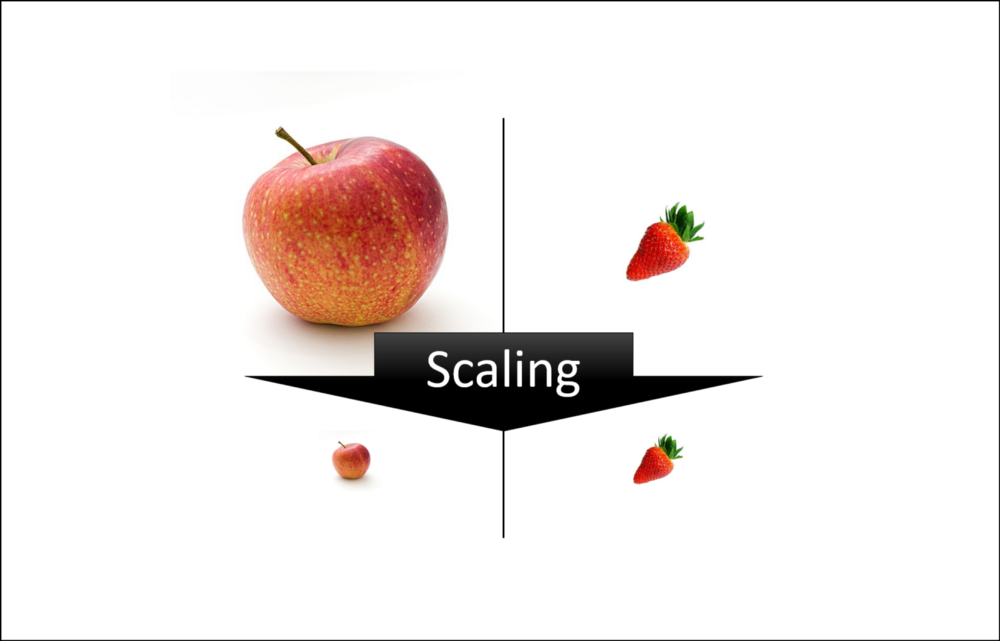

In [17]:
# coefficient değerleri bir scale işlemi yapılmaz ise yanıltıcı olabilir.
# scale yapmadan feature lar arasında bir önem sıralaması yapamayız.
# büyüklüklerine göre coefficient değerlerini yorumlamak yanıltıcı olur.
# bu nedenle datayı modele vermeden önce scale yapılmalıdır.

# Gradient tabanlı modellerde modelin hızını arttırmak
# feature ların önem derecesinin tespit etmek
# distance tabanlı modellerde geniş aralığa yayılan değerlere sahip feature lara daha fazla önem vermesini engellemek için 
# SCALING yapılır

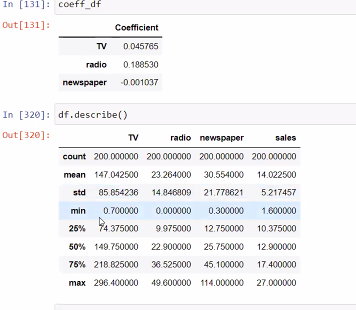

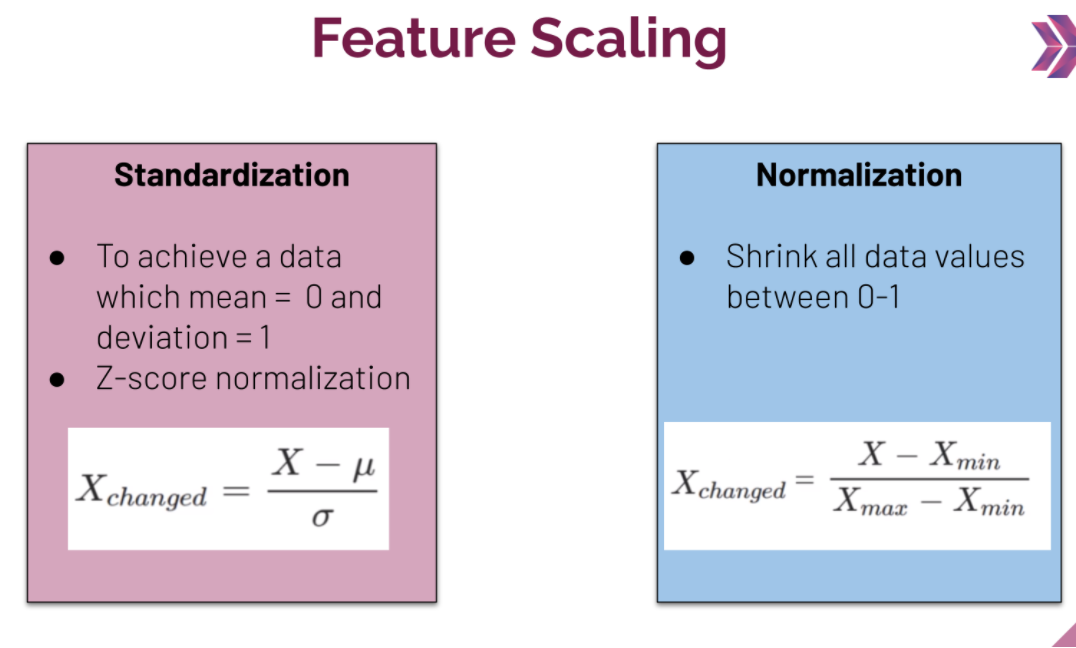

In [18]:
# Standardization ne yapiyor, aliyor Feature'u ortalamasi = 0 ve standart sapmasi 1 olacak sekilde normal dagilimdaki Z score
# unu yerlestiriyor.
# Normalization (Minmaxscaled) 0 ile 1 arasina Feature deki data yi oranlayip yerlestiriyor.

In [19]:
# Scaling: Data yı aynı aralıklara sğdırma işlemi. 
# ML de bir feature ın önemli olup olmadığını katsayılar ile ifade edilir. 
# Feature lar değişik aralık değerine sahip olabilir. 
# Eğer scale yapmazsak büyük aralıktaki feature lar daha çok ağırlıklandırılır. Bunu engellemek için scale kullanıyoruz. 
# Gradient descent leri kullanan modellerde çok etkili olmasa da yine de faydalıdır.  
# Hatanın minimum olduğu noktaya inerken adım sayısı arttığı için işlem uzar. Modelin hızını artırır.
# ScaLe işlemi yapılmamışsa bazen denge noktası kaçırılabilir. 
# Tree base modeller scale gerektirmez. 
# Eğer yapıp yapmama arasında bir kararsızlık varsa, hangi algoritmada yapılmaması veya yapılması gerek mi diye kafamız 
# karışırsa yapar geçeriz. 
# İşlemlerimizi hızlandırır.

# standard scale:

# minmax scale: feature larda dummies type feature lar varsa tercih edilir. 
# Deep learning modellerinde çoğunlukla-her zaman tercih edilir.
# DL de, değerlerin 1 den büyük değerler alması loss function ı etkiliyor

# RobustScaler: Outlier ile mücadele için kullanılır. 
# Data da outlier durumuna bakılır ve bu şekilde kullanılmasına karar verilir.

# target hiçbir zaman scale edilmez. 
# Data leakage ı engellemek için sadece x_train i FIT_TRANSFORM, x_test i TRANSFORM yapıyoruz.

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [21]:
scaler.fit(X_train)  # standard scale e ait denlemi kuruyor


# sızıntı olmasını engellemek için tüm dataya uygulamıyorum, sadece train ile yapıyorum (test datasını kesinlikle eklemiyorum) 
# Datamdaki her bir feature ın ortalama ve std sapma bilgilerimi aldı ve atadı. 

# datamdaki mean ve std bilgilerini alıyor ve scaler içinde bunları kullanıyor.

StandardScaler()

In [22]:
X_train_scaled = scaler.transform(X_train)   # standard scale e ait denlem ile X_train i dönüştürüyor.
X_train_scaled

# bu bana z score ları veriyor. O yüzden buna z-score scaling de deniyor.
# Bu değerler standart dağılımda z score olarak nereye tekabul ettiğini gösterir. 
# Mean lerin 0 , std lerin 1 e denk geldiği z score lar.

array([[-0.40424839, -1.02823707, -0.33767538, ..., -0.44017978,
        -0.35817255, -0.28930697],
       [ 0.32060772, -0.91982774, -1.16143931, ..., -0.44391152,
        -0.36370582, -0.29622876],
       [-1.27051084,  0.2591237 ,  0.25425079, ..., -0.28157937,
        -0.26073421, -0.24008316],
       ...,
       [ 0.80424121,  0.71986334,  1.43317042, ...,  0.7705482 ,
         0.6680601 ,  0.45733704],
       [ 0.1851428 , -0.87239866, -0.60897488, ..., -0.44115811,
        -0.36130657, -0.29446003],
       [ 1.54692165, -0.86562307, -0.42153159, ..., -0.43876277,
        -0.35836127, -0.29150925]])

In [23]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

# burada X_train setinin MEAN ve STD değerleri ile dönüşüm yapıyor.
# eğitimi X_train ile yapmıştık (FIT)
# modelin doğru prediction lar yapabilmesi için X_test in dönüşümünü X_train seti dönüşümü üzerinden yapmalıyız.
# çünkü SCALE X_train e göre fit yapıldı

array([[ 0.15781217,  0.59112727,  1.13227461, ...,  0.33494015,
         0.26526052,  0.14042253],
       [ 0.53925283,  1.68199613,  1.13227461, ...,  1.33091017,
         0.5857351 ,  0.14042253],
       [ 1.69783431,  0.36753303,  0.65380096, ..., -0.10377617,
        -0.11321161, -0.13764621],
       ...,
       [ 1.46968288,  0.40818653,  1.46769945, ...,  0.49244978,
         0.5693803 ,  0.50311419],
       [-0.38998892, -0.55394626, -1.21076649, ..., -0.44385169,
        -0.36371371, -0.29623523],
       [-1.45588388, -1.44154763, -0.45606062, ..., -0.44391134,
        -0.36299878, -0.292234  ]])

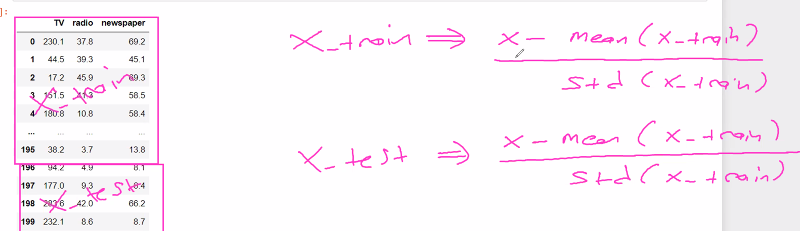

In [24]:
# aşağıdaki işlemle scale yapılıp yapılmadığını kontrol ediyoruz
# scale işlemini AGG uygulayabilmek için dataframe haline getirdik

### checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.


In [25]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003


In [26]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.177,0.132,0.15,-0.124,-0.013,0.078,0.134,0.132,0.309,-0.096,-0.005,0.081,0.037,0.053,0.172,0.129,0.121,0.253,0.454,-0.084,-0.004,0.079,0.029,0.041,0.130,0.060,0.045,0.094,0.203,0.126,0.103,0.231,0.379,0.579,-0.08,-0.012,0.072,0.014,0.029,0.104,0.042,0.023,0.048,0.124,0.076,0.038,0.076,0.109,0.207,0.127,0.086,0.203,0.355,0.497,0.682
std,1.087,1.023,1.33,1.021,1.074,1.200,1.051,1.239,1.701,0.975,1.004,1.140,1.069,1.028,1.203,1.092,1.185,1.605,2.209,0.946,0.920,1.070,0.961,0.923,1.057,1.101,0.996,0.971,1.158,1.133,1.153,1.537,2.113,2.781,0.93,0.853,1.003,0.834,0.826,0.929,0.966,0.853,0.806,0.916,1.149,1.012,0.952,0.897,1.102,1.171,1.140,1.467,2.036,2.708,3.371


In [27]:
# arada 2 gibi değişik değerler var.
# mean ve std değerlerini x_train e göre hesapladı
# x_train e göre hesapladığı mean ve std değerleri üzerinden x_test üzerinde transform yapıyor.
# x_test üzerinde x_train aralığında bulunmayan bir değer olursa x_test için bulunan mean ve std değerleri değişebilir.

# x_train değerleri --> 0-100 aralığında
# x_test değerleri --> 0-200 aralığında

In [28]:
print("X_train_min :", np.min(X_train))
print("X_train_max :", np.max(X_train))
print("X_test_min  :", np.min(X_test))
print("X_test_max  :", np.max(X_test))
print("--------------------------------------")
print("X_train_range :", np.min(X_train), "-", np.max(X_train))
print("X_test_range  :", np.min(X_test), "-", np.max(X_test))
print("--------------------------------------")
print("X_train_scaled_range :", np.min(X_train_scaled), "-", np.max(X_train_scaled))
print("X_test_scaled_range  :", np.min(X_test_scaled), "-", np.max(X_test_scaled))

X_train_min : 0.0
X_train_max : 2287657460937.738
X_test_min  : 0.5904900000000002
X_test_max  : 2155742373809.8557
--------------------------------------
X_train_range : 0.0 - 2287657460937.738
X_test_range  : 0.5904900000000002 - 2155742373809.8557
--------------------------------------
X_train_scaled_range : -1.7743452470883727 - 11.281387258586248
X_test_scaled_range  : -1.7184956785959022 - 19.998892674617288


## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [30]:
lm.fit(X_train_scaled, y_train)

# scale yapıldıktan sonra işlemlere scale edilmiş data ile devam ediyoruz.

LinearRegression()

In [31]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

# hem train hem de test data ile ayrı ayrı prediction yapıyorum.
# Skorları karşılaştıracağım

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [33]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.997581,-1.423718
mae,0.187958,2.107643
mse,0.062748,76.501251
rmse,0.250495,8.746499


In [34]:
# train ve test skorlarına baktığımızda OVERFITTING olduğu bariz bir şekilde görülüyor.
# train seti skorları iyi, test seti skorları kötü
# OVERFITTING nereden kaynaklanıyor? Buna bakmalıyız.
# - Feature sayısı çok olmuş olabilir. 
# - Feature ların kuvvetlerinin alınmış olması, 
# - Feature lar arasında kuvvetli korelasyon olması(Multicolineratiy))
# - Almış olduğumuz tek seferlik skor data nın kötü yerine denk gelmiş olabilir.

# Feature lar arasında ciddi bir kuvvetli korelasyon varsa buna da Multicolineratiy denir.

## Multicolineratiy

If there is a strong correlation between the independent variables, this situation is called **multicolineraty**.
 
**Multicolineraty** prevents my model from detecting important features.

In [35]:
# bağımsız değişkenler arasında kuvvetli correlasyon varsa multicolineratiy sorunu olabilir.
 
# multicolineratiy sorununu önlemezsem feature importance alınırken modelim için çok önemli olan bir future ı kaçırabilirim. 
# çünkü correlasyondan dolayı normalde önemli olan feature ımı düşük etkili gösterebilir. 

# ridge ve lasso sadece regularization yapmakla kalmıyor, aynı zamanda multicolineratiy sorununu da önlüyor.

In [36]:
def color_red(val):
    
    if (val > 0.90 and val < 0.99) or (val < -0.90 and val > -0.99):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

# %90 ve üzeri bir multicorolasyon göstergesidir.

In [37]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

In [292]:
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

def multicolinearity_control(df):                    
    df_temp = df.corr()
    count = 'Done'
    feature =[]
    collinear= []
    for col in df_temp.columns:
        for i in df_temp.index:
            if abs(df_temp[col][i] > .9 and df_temp[col][i] < 1):
                    feature.append(col)
                    collinear.append(i)
                    cprint(f"Multicolinearity alert in between --> {col} - {i} --> {round(df_temp[col][i], 2)}", "red", attrs=["bold"])
    else:
        cprint(f"There is NO multicollinearity problem.", "blue", attrs=["bold"])    
        
multicolinearity_control(pd.DataFrame(poly_features))

Multicolinearity alert in between --> 0 - 3 --> 0.97
Multicolinearity alert in between --> 0 - 9 --> 0.91
Multicolinearity alert in between --> 1 - 6 --> 0.97
Multicolinearity alert in between --> 1 - 15 --> 0.91
Multicolinearity alert in between --> 2 - 8 --> 0.94
Multicolinearity alert in between --> 3 - 0 --> 0.97
Multicolinearity alert in between --> 3 - 9 --> 0.98
Multicolinearity alert in between --> 3 - 19 --> 0.95
Multicolinearity alert in between --> 3 - 34 --> 0.91
Multicolinearity alert in between --> 4 - 10 --> 0.97
Multicolinearity alert in between --> 4 - 12 --> 0.96
Multicolinearity alert in between --> 4 - 20 --> 0.91
Multicolinearity alert in between --> 4 - 22 --> 0.95
Multicolinearity alert in between --> 4 - 25 --> 0.91
Multicolinearity alert in between --> 4 - 37 --> 0.91
Multicolinearity alert in between --> 4 - 40 --> 0.91
Multicolinearity alert in between --> 5 - 11 --> 0.97
Multicolinearity alert in between --> 5 - 14 --> 0.94
Multicolinearity alert in between 

## Cross Validate

We do cross-validation to check whether the one-time scores we receive are consistent or not

cross validation is only applied to the train set.

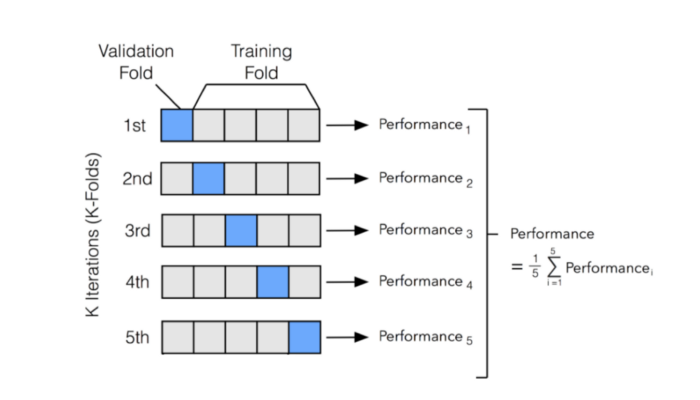

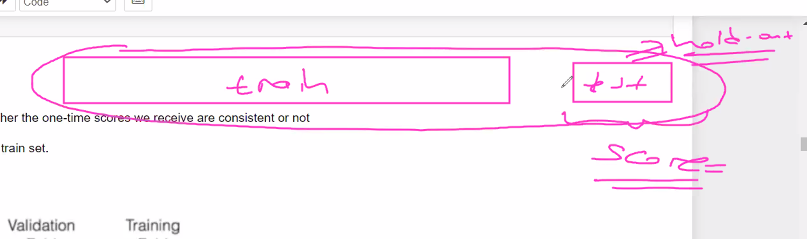

In [ ]:
# cros_validate : arka planda modelleri oluşturup sadece skor verirken,

# grid_search  (ridgecv, lassocv) ise : arka planda modelleri oluşturup skorları bulur ve en iyi skoru veren modeli bize çıktı 
# olarak sunar. Yani elimizde bir model olur.

In [185]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted']

In [186]:
# scikit-learn en iyi skorları max olarak almış
# ama burada biz minimize etmek istediğimiz skorlar var. (ERROR METRICS)
# scikit learn bu skorların daha iyi skor görünebilmesi için negatif tarafta max görünebilmesi için başına neg eklemiş
# skoru en yukarlarda göstermek için başına bir - (negative) işareti koyuyoruz.

In [187]:
from sklearn.model_selection import cross_validate, cross_val_score 

# cross_validate i kullanmak cross_val_score u kullanmaya göre daha pratik.

In [188]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

# cross_val.. bunları ne yapıyor? kendi içinde bunları 10 parçaya bölüyor. 1 parçasını test, 9 parçasını train için ayırıyor. 
# ve test verilerini sırayla kaydırarak farklı farklı 9'arlı train grupları için validation yapıyor.

In [189]:
scores

# çıktı json formatında

{'fit_time': array([0.00699925, 0.0059824 , 0.00599122, 0.00800633, 0.01101518,
        0.00700402, 0.00698948, 0.00801039, 0.00800681, 0.00997138]),
 'score_time': array([0.00401282, 0.00201797, 0.00299668, 0.00203395, 0.00099134,
        0.00402713, 0.00200295, 0.00097084, 0.00199103, 0.00701356]),
 'test_r2': array([ 0.94345854,  0.98360242,  0.97961969, -5.69207862,  0.99353704,
         0.99682955,  0.9907342 ,  0.99244878,  0.97990659,  0.99041525]),
 'test_neg_mean_absolute_error': array([-0.38633232, -0.45398645, -0.43863405, -3.57023678, -0.30378975,
        -0.27952145, -0.33635204, -0.4075215 , -0.44307322, -0.26112228]),
 'test_neg_mean_squared_error': array([-2.83944122e-01, -3.90895190e-01, -3.64727908e-01, -1.66686869e+02,
        -1.53806155e-01, -1.04168470e-01, -2.00499895e-01, -3.08898901e-01,
        -6.10626218e-01, -1.23433602e-01]),
 'test_neg_root_mean_squared_error': array([ -0.53286407,  -0.62521611,  -0.60392707, -12.91072691,
         -0.39218128,  -0.322751

In [190]:
pd.DataFrame(scores, index = range(1,11))

# json formatındaki çıktıyı daha rahat okuyabilmek için df haline getiriyoruz

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.006999,0.004013,0.943459,-0.386332,-0.283944,-0.532864
2,0.005982,0.002018,0.983602,-0.453986,-0.390895,-0.625216
3,0.005991,0.002997,0.979620,-0.438634,-0.364728,-0.603927
4,0.008006,0.002034,-5.692079,-3.570237,-166.686869,-12.910727
5,0.011015,0.000991,0.993537,-0.303790,-0.153806,-0.392181
6,0.007004,0.004027,0.996830,-0.279521,-0.104168,-0.322751
7,0.006989,0.002003,0.990734,-0.336352,-0.200500,-0.447772
8,0.008010,0.000971,0.992449,-0.407521,-0.308899,-0.555787
9,0.008007,0.001991,0.979907,-0.443073,-0.610626,-0.781426
10,0.009971,0.007014,0.990415,-0.261122,-0.123434,-0.351331


In [191]:
# lineer regresyonda yukarda 4. satırda görülen benzeri bozuk skorlar ile karşılaşılabiliyor
# fazla feature ve az row a sahip datalarda bu tür prb olabiliyor.
# bazı kaynaklarda eğer linreg kullanılacaksa benzeri prb ile karşılaşılmaması için ridge ve lasso tavsiye ediliyor

In [192]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                              0.315847
test_neg_mean_absolute_error        -0.688057
test_neg_mean_squared_error        -16.922787
test_neg_root_mean_squared_error    -1.752398
dtype: float64

In [193]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.997581,-1.423718
mae,0.187958,2.107643
mse,0.062748,76.501251
rmse,0.250495,8.746499


In [ ]:
# OVERFITTING den şüphelenmek için TRAIN ve TEST skorları arasında nasıl bir fark olmalı?

# TRAIN ve TEST skorları arasında fark varsa

# - Öncelikle cross validation yapmalıyız. TRAIN ve TEST skorlarını buna göre değerlendirmeliyiz.
# - Ardından hyperparameter lar ile oynayarak TEST skorunu TRAIN skoruna yaklaştırmaya çalışmalıyız.
# - Bu yaklaştırma sonucunda skorları değerlendirmeliyiz.

In [ ]:
# OUTLIER

# Normalde gerçek dünya verisinde outlier olmaz. Model için yetersiz veri olur.
# Datasetinin özelinde outlier lara ne yapılacağı tespit edilmelidir.
# Doğrudan outlier lara değişik yöntemlerle müdahale etmek modellemenin hatalı olmasına neden olabilir.

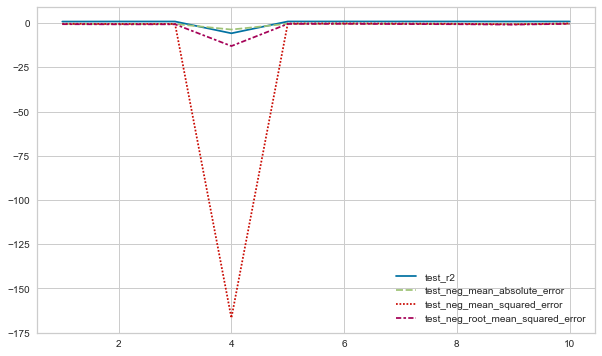

In [194]:
sns.lineplot(data = scores.iloc[:,2:]);

In [195]:
lm.coef_

array([ 16.59727508,  -5.40405972,  -1.74928347, -62.33833778,
        16.90858661, -17.0396797 ,  18.33163138,  17.36342203,
        13.11462122, 111.07662344, -22.81391604,  44.26971429,
       -14.94945789, -26.02529709,  32.27766406, -29.6922559 ,
       -17.88079357, -30.82621205, -35.40557097, -93.69458809,
        27.30198689, -49.13969978, -10.86611732,  44.48527329,
       -55.26045722,  24.00912753,   1.98877056,  14.83064039,
       -16.4443257 ,  24.55166492,   2.88839217,  27.34790657,
        21.76432967,  42.14254255,  29.91636033, -12.96100179,
        20.98438147,  12.13988278, -26.82413453,  26.51197649,
        -7.92317222,   4.38181124,  -7.34055459,  14.14705248,
        -4.83551241,  -4.8904204 ,   2.54950883, -11.77617458,
         7.74633833, -10.15349317,   8.1863474 , -17.73958393,
         1.13383523,  -8.53196007, -20.74476395])

In [196]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,16.597275
1,-5.404060
2,-1.749283
3,-62.338338
4,16.908587
5,-17.039680
6,18.331631
7,17.363422
8,13.114621
9,111.076623


## Ridge Regression

Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting and overfiting. 

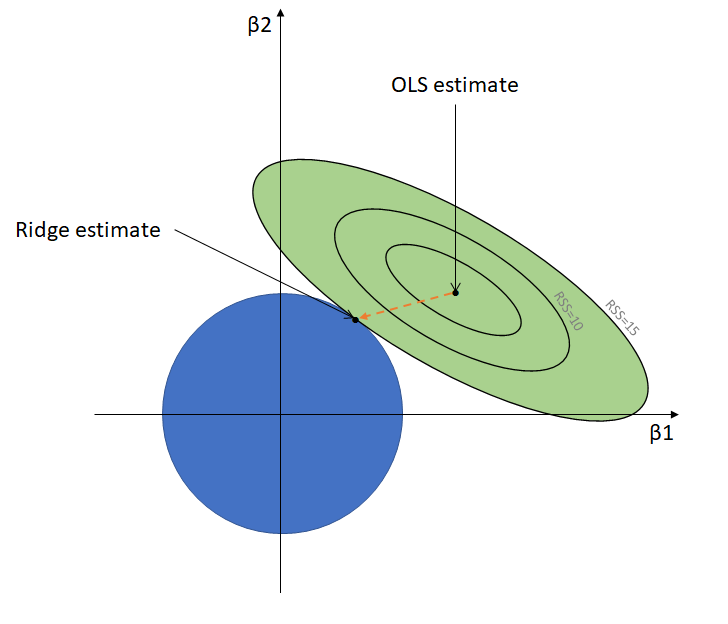

In [ ]:
# RIDGE : TRAIN setine BIAS ilave ederek TRAIN ve TEST seti arasındaki varyansı azaltmaya çalışıyor

# train setine bir miktar hata ekleyerek hatanın 0 olduğu noktayı train setinden uzaklaştırıyor ve test setine yaklaştırıyor

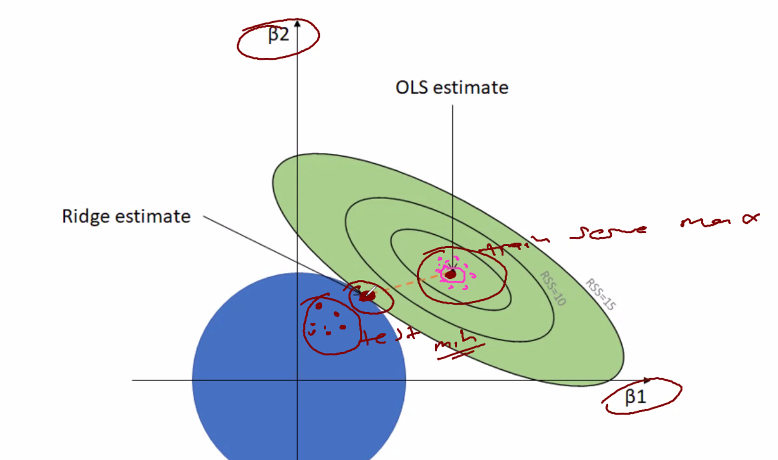

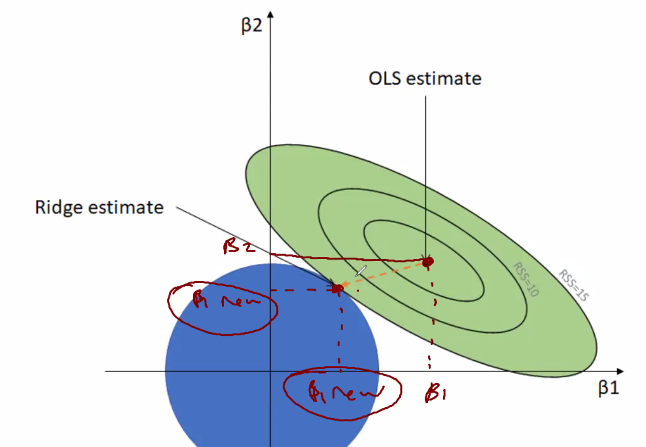

In [ ]:
# Ridge: Katsayıları alpha yardımıyla 0 a yaklaştırarak varyansı azaltıyor.
# Bias ekleyerek variance-bias dengesini sağlıyoruz. 
# overfittingden balance kismina çekiyoruz.

# Biraz hata vererek train skorunu etkiliyoruz 
# ama train datam ile test datamın arasındaki fazla olan R2 farkını azaltmış oluyoruz. 
# yani bias ekleyerek modelin datayı ezberlemesini engellemiş olduk..

In [197]:
from sklearn.linear_model import Ridge

In [198]:
ridge_model = Ridge(alpha=1)

In [ ]:
# Bir model içinde değerler ile oynayarak skoru etkilediğimiz değerlere HYPERPARAMETRE denir

# RIDGE için alpha değeri ile oynayacağız.
# alpha değeri büyüdükçe REGULARIZATION değeri büyüyor (ilave edilen BIAS değeri büyüyor)
# alpha değeri küçüldükçe REGULARIZATION değeri küçülüyor (ilave edilen BIAS değeri küçülüyor)

In [199]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [200]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [201]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.987205,0.984232
mae,0.364623,0.557799
mse,0.331859,0.497710
rmse,0.576072,0.705486


In [202]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997581,-1.423718,0.987205,0.984232
mae,0.187958,2.107643,0.364623,0.557799
mse,0.062748,76.501251,0.331859,0.497710
rmse,0.250495,8.746499,0.576072,0.705486


In [ ]:
# LINEAR_TRAIN ve RIDGE_TRAIN skorları karşılaştırıldığında

# RIDGE ile BIAS ekleyerek train skorunu etkiliyoruz
# train datam ile test datamın arasındaki fazla olan R2 farkını azaltmış oluyoruz. 
# yani bias ekleyerek modelin datayı ezberlemesini engellemiş olduk.

# TRAIN ve TEST skorları birbirine yaklaşmış. RIDGE görevini yapmış.

## For Ridge Regression CV with alpha : 1 

In [203]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [ ]:
# cv yapmadan önce modeli tekrar sıfırlamak gerekli. --> model = Ridge(alpha=1)
# Yukarda test skorunu hangi hyperparametre ler ile almış isem cv de de aynı paramatre değerlerini kullanmak gerekli

In [204]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.003049,0.003954,0.909424,-0.554577,-0.454859,-0.674433
2,0.004000,0.002026,0.988384,-0.407609,-0.276898,-0.526211
3,0.005977,0.003994,0.985714,-0.415267,-0.255661,-0.505629
4,0.007006,0.002996,0.920100,-0.763229,-1.990155,-1.410728
5,0.002999,0.002003,0.995553,-0.257907,-0.105827,-0.325311
6,0.005003,0.003991,0.977663,-0.388813,-0.733912,-0.856687
7,0.005008,0.002987,0.992759,-0.365033,-0.156693,-0.395845
8,0.004004,0.000997,0.993167,-0.439520,-0.279522,-0.528698
9,0.002018,0.000981,0.915947,-0.754910,-2.554330,-1.598227
10,0.002008,0.001990,0.985719,-0.338109,-0.183907,-0.428843


In [205]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.966443
test_neg_mean_absolute_error       -0.468497
test_neg_mean_squared_error        -0.699176
test_neg_root_mean_squared_error   -0.725061
dtype: float64

<AxesSubplot:>

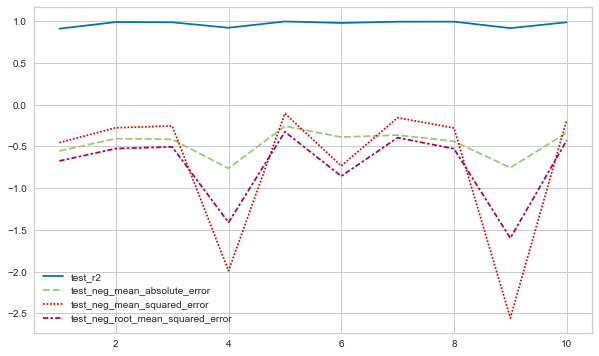

In [206]:
sns.lineplot(data = scores.iloc[:,2:])

In [207]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.987205,0.984232
mae,0.364623,0.557799
mse,0.331859,0.497710
rmse,0.576072,0.705486


In [ ]:
# skorlar tutarlı

In [208]:
ridge_model.coef_

array([ 3.71450604e+00,  6.75147866e-01,  2.45026233e-01, -1.03692214e+00,
        2.49619996e+00,  2.50747065e-01, -3.80972752e-02,  1.63781753e-01,
       -1.92793081e-01, -1.06022676e+00, -6.67857903e-02, -8.12695795e-01,
        1.25026950e+00,  4.88024688e-02,  1.10978317e-01, -3.07452443e-01,
        9.43623052e-02, -8.78442019e-02,  1.78689946e-04, -2.82098333e-01,
        1.79583653e-02, -2.63853784e-01, -4.24176994e-01, -2.44464854e-01,
       -1.13438874e-01,  6.99959186e-01, -1.51234093e-01, -8.44789444e-03,
        1.09260084e-01, -3.00740259e-01,  1.18474476e-01, -1.99970798e-02,
        1.00228457e-02,  6.94485746e-02,  4.49056790e-01,  4.73744361e-01,
        4.37318666e-01, -1.85196676e-01,  2.84736636e-01,  2.57367999e-01,
       -6.40738959e-01, -1.85031251e-01,  1.42459291e-01, -2.09667359e-03,
        4.09916098e-01, -2.01252496e-01,  3.47886931e-03,  6.83023968e-02,
       -1.15775095e-01, -1.65831448e-01,  1.58292458e-01,  3.60547037e-03,
        1.65384202e-03, -

In [209]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [210]:
pd.concat([lm_df,rm_df], axis = 1)

# buradaki + - işaretleri pozitif ve negatif yönü gösterir.
# ancak hangi feature ın ne kadar etkilediğini görmek için mutlak değerli büyüklüklerine göre bakmak gerekli.

,lm_coef,ridge_coef_1
0,16.597275,3.714506
1,-5.404060,0.675148
2,-1.749283,0.245026
3,-62.338338,-1.036922
4,16.908587,2.496200
5,-17.039680,0.250747
6,18.331631,-0.038097
7,17.363422,0.163782
8,13.114621,-0.192793
9,111.076623,-1.060227


In [ ]:
# 1-2 katsayı hariç neredeyse tüm katsayıları 0 a yaklaştırarak complexity i azaltmış
# Önemli feature katsayılarını büyük tutmuş, diğerlerini 0 a yakınsamış
# ridge katsayılarına bakarak büyük katsayılar önemli feature lar, küçük katsayılar önemsiz feature lar
# önemli ve önemsiz feature gruplaması yapılabilir. Ancak bu sonuçlara göre FEATURE SELECTION yapamayız.

## Choosing best alpha value with GridSearchCV for Ridge

In [ ]:
# GRIDSEARCH : finetuning
# param_grid ile parametrelere aralıklar ve değişik değerler belirliyorum.
# belirlenen aralık içinde ve belirlenen değişik değerler için modeli çalıştırarak en iyi skoru veren parametreleri belirliyor.

# best_parametre ler belirlediğimiz aralıkların max veya min değerlerine eşit çıkabilir.
# max veya min durumuna göre yeni aralıklar belirlenmelidir.

# hyperparameters a ilişkin default değerlerin rastgele belirlenmemektedir.
# Birçok modelleme sonucunda bu değerlerin tespit edilmekte ve sürekli güncellenmekte.
# default değerler genelde best skoru verir. Ancak vermediği durumlarda gridsearch yapılmalı

In [211]:
from sklearn.model_selection import GridSearchCV

In [212]:
alpha_space = np.linspace(0.01, 1, 100) # alpha mutlaka pozitif bir sayı olmalı
alpha_space                             # bu aralığı azaltıp arttırabilirsin.
                                        # ama aldığımız sonuçlarda aman aman bir fark olmadığı için böyle bırakıyorum 

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [213]:
ridge_model = Ridge()

In [214]:
param_grid = {"alpha":alpha_space}

In [215]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [216]:
grid_ridge.fit(X_train_scaled, y_train) # model = Ridge(alpha=0.2)

# cv den farklı olarak burada mutlaka FIT yapmam gerekiyor

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] .......

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................................... alpha=0.05, total=   0.0s
[CV] alpha=0.05 ......................................................
[CV] ....................................... alpha=0.05, total=   0.0s
[CV] alpha=0.05 ......................................................
[CV] ....................................... alpha=0.05, total=   0.0s
[CV] alpha=0.05 ......................................................
[CV] ....................................... alpha=0.05, total=   0.0s
[CV] alpha=0.05 ......................................................
[CV] ....................................... alpha=0.05, total=   0.0s
[CV] alpha=0.05 ......................................................
[CV] ....................................... alpha=0.05, total=   0.0s
[CV] alpha=0.060000000000000005 ......................................
[CV] ....................... alpha=0.060000000000000005, total=   0.0s
[CV] alpha=0.060000000000000005 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.5s finished


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [217]:
grid_ridge.best_params_

{'alpha': 0.02}

In [218]:
pd.DataFrame(grid_ridge.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002621,0.000436,0.000400,0.000491,0.01,{'alpha': 0.01},-0.578223,-0.592915,-0.666675,-1.058334,-0.410494,-0.547762,-0.408349,-0.458808,-1.321346,-0.342178,-0.638509,0.297040,2
1,0.002495,0.000626,0.000497,0.000497,0.02,{'alpha': 0.02},-0.554132,-0.604376,-0.676790,-0.684998,-0.417295,-0.586006,-0.373666,-0.436309,-1.365495,-0.347477,-0.604654,0.278635,1
2,0.002507,0.000916,0.000601,0.000491,0.03,{'alpha': 0.03},-0.548039,-0.614906,-0.673756,-0.992339,-0.425431,-0.612027,-0.354327,-0.427492,-1.387301,-0.351224,-0.638684,0.308187,3
3,0.002802,0.001254,0.000902,0.000538,0.04,{'alpha': 0.04},-0.547655,-0.622293,-0.666758,-1.270073,-0.431859,-0.630645,-0.342303,-0.424330,-1.400078,-0.353994,-0.668999,0.351597,4
4,0.003621,0.002025,0.000996,0.000638,0.05,{'alpha': 0.05},-0.549274,-0.627121,-0.658777,-1.472465,-0.436510,-0.644739,-0.334434,-0.423703,-1.408497,-0.356183,-0.691170,0.390933,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003604,0.002767,0.000796,0.000398,0.96,{'alpha': 0.9600000000000001},-0.670845,-0.528425,-0.507336,-1.436843,-0.327339,-0.851722,-0.393058,-0.525084,-1.592702,-0.426487,-0.725984,0.419765,12
96,0.002701,0.001416,0.000699,0.000457,0.97,{'alpha': 0.97},-0.671750,-0.527857,-0.506899,-1.430224,-0.326808,-0.852973,-0.393762,-0.525993,-1.594097,-0.427080,-0.725744,0.418921,11
97,0.002600,0.001199,0.000600,0.000490,0.98,{'alpha': 0.98},-0.672650,-0.527299,-0.506470,-1.423665,-0.326293,-0.854218,-0.394461,-0.526899,-1.595482,-0.427671,-0.725511,0.418093,10
98,0.002302,0.000456,0.000499,0.000499,0.99,{'alpha': 0.99},-0.673544,-0.526750,-0.506046,-1.417167,-0.325794,-0.855455,-0.395155,-0.527800,-1.596859,-0.428259,-0.725283,0.417283,9


In [219]:
grid_ridge.best_index_

1

In [220]:
grid_ridge.best_score_

# arka planda GRIDSEARCH cross_validation yaptığından ilave CROSS_VALIDATION yapmaya gerek yok.

-0.6046542768937913

In [221]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

# GRIDSEARCH bir model gibi davrandığı için prediction yapabiliyoruz.

In [222]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

,grid_ridge_train,grid_ridge_test
R2,0.993766,0.989353
mae,0.271564,0.410962
mse,0.161686,0.336050
rmse,0.402102,0.579698


In [ ]:
# train ile test datamın R2 değerleri ridge gridsearch sayesinde birbirine yaklaştı. 

In [223]:
pd.concat([ls, rs, rgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698


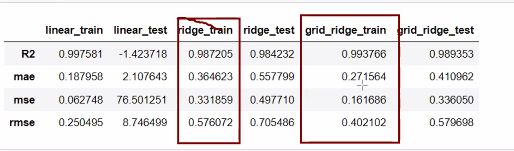

In [293]:
# alpha katsayısının büyüklüğü uyguladığımız REGULARIZATION ın büyüklüğünü gösteriyor.
# alpha değeri büyüdükçe REGULARIZATION değeri büyüyor (ilave edilen BIAS değeri büyüyor)
# alpha değeri küçüldükçe REGULARIZATION değeri küçülüyor (ilave edilen BIAS değeri küçülüyor)

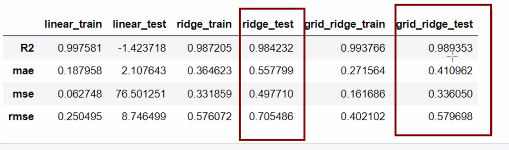

In [224]:
rm = Ridge(alpha=0.02).fit(X_train_scaled, y_train) 
rm.coef_

# 'GridSearchCV' object has no attribute 'coef_'
# Bu nedenle bulduğumuz en iyi alpha değeri ile modeli manuel kurup katsayıları yeniden almamız gerekiyor.

array([  7.45625463,   0.13786108,   1.16486714, -10.18153931,
         4.61608206,  -1.25503733,   0.33042816,   0.78901269,
        -1.77479528,   3.10639146,  -3.15252645,  -1.26649515,
         0.43831683,  -0.53218919,   1.18458917,  -0.21141339,
         0.38750327,  -1.35413514,   0.39189611,   4.3004558 ,
         4.40676019,   2.30597279,  -3.10358629,   1.78779727,
         0.09856193,   1.54687505,  -0.83217856,  -0.78611457,
         0.71354068,  -0.40265794,   0.1448194 ,   0.14369358,
         0.55987005,   1.42302118,  -2.84496696,  -2.01918122,
        -0.63602304,   3.14601169,  -2.10227164,  -0.54967264,
        -3.70340385,   1.65632943,   1.12644095,   0.03750742,
         2.39600492,  -0.49305799,  -0.53507419,  -0.14507989,
        -0.7541191 ,  -0.43272424,  -0.43997281,   0.07342927,
         0.79820263,  -0.4177175 ,  -0.92156695])

In [225]:
rgm_df = pd.DataFrame(rm.coef_, columns=["ridge_coef_0.02"])

In [226]:
pd.concat([lm_df,rm_df, rgm_df], axis = 1)

# Alfa değerim büyüdükçe (0.02 den 1 olduğunda) coef katsayılarım azalıyor! 
# Dikkat! çok büyütürsek UNDERFITTING'e gider!!

,lm_coef,ridge_coef_1,ridge_coef_0.02
0,16.597275,3.714506,7.456255
1,-5.404060,0.675148,0.137861
2,-1.749283,0.245026,1.164867
3,-62.338338,-1.036922,-10.181539
4,16.908587,2.496200,4.616082
5,-17.039680,0.250747,-1.255037
6,18.331631,-0.038097,0.330428
7,17.363422,0.163782,0.789013
8,13.114621,-0.192793,-1.774795
9,111.076623,-1.060227,3.106391


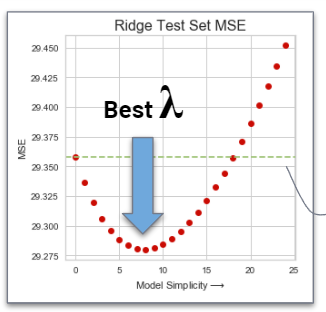

In [ ]:
# best alpha değerini bulduktan sonra alpha değerini büyütmek modeli UNDERFITTING e götürür.
# Çünkü alpha yı büyüttükçe regularization ı büyütüyor ve modelin complexity sini azaltıyoruz.
# Bu dengeye dikkat.

## LASSO

In [ ]:
# LASSO, doğrudan önemsiz tüm feature ların katsayısını 0 lar
# Bu nedenle elimizde sadece ÖNEMLİ feature lar kalır.
# Bu nedenle kalan feature lar ile FEATURE SELECTION değerlendirmesi yapabiliyoruz.

# RIDGE sadece sıfıra yakınsadığından sadece GRUPLAMA yapabiliyoruz.

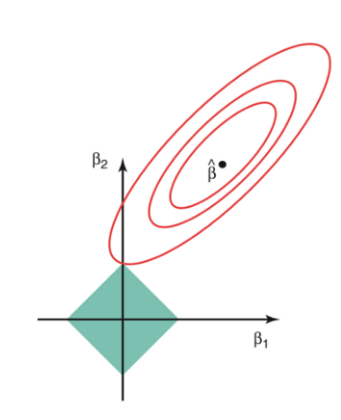

In [ ]:
# LASSO Ridge gibi değildir, acımasızdır. 
# Dikkat! alfa büyüdükçe elimizde o kadar az feature kalır. 
# O yüzden o dengeyi sağlamak gerek.

In [227]:
from sklearn.linear_model import Lasso

In [228]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [229]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [230]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.916066,0.918582
mae,1.021833,1.194105
mse,2.176931,2.569845
rmse,1.475443,1.603074


In [231]:
pd.concat([ls, rs, rgs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074


In [ ]:
# LASSO skorları düştü
# UNDERFITTING söz konusu

## For Lasso CV with Default Alpha : 1

In [232]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [ ]:
# İLk parametre değerleri ile CV yapıyorum

In [233]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002034,0.002974,0.706630,-0.806709,-1.473267,-1.213782
2,0.001986,0.002001,0.918510,-0.997634,-1.942615,-1.393777
3,0.002991,0.005019,0.962622,-0.693933,-0.668914,-0.817872
4,0.001999,0.001994,0.933193,-0.940894,-1.664037,-1.289976
5,0.001997,0.006005,0.928358,-1.158430,-1.704932,-1.305730
6,0.003000,0.002001,0.866498,-1.387719,-4.386342,-2.094360
7,0.002003,0.000989,0.928574,-1.016796,-1.545570,-1.243209
8,0.001009,0.003997,0.941482,-1.161680,-2.393813,-1.547195
9,0.005025,0.002980,0.811842,-1.486293,-5.718008,-2.391236
10,0.000984,0.003000,0.905500,-0.829083,-1.216981,-1.103169


In [234]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.890321
test_neg_mean_absolute_error       -1.047917
test_neg_mean_squared_error        -2.271448
test_neg_root_mean_squared_error   -1.440031
dtype: float64

In [235]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.916066,0.918582
mae,1.021833,1.194105
mse,2.176931,2.569845
rmse,1.475443,1.603074


In [ ]:
# evet skorlar düşük, UNDERFITTING söz konusu
# ama TEST ve TRAIN skorları tutarlı

In [236]:
lasso_model.coef_

# Lasso bana en önemli feature'u ya da feature ları veriyor. Doğrudan bu feature ya da feature lar en önemlisi diyebiliyoruz.

array([0.69600691, 0.        , 0.        , 0.        , 3.44893766,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [237]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [238]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df], axis = 1)

# aşağıdaki karşılaştırma da bize en önemli feature'u veriyor. Doğrudan bu feature en önemlisi diyebiliyoruz.
# RIDGE de bu şekilde değil. Orada sadece gruplandırma yapabiliyoruz.
# LASSO ise doğrudan katsayıları 0 a eşitleyerek önemsiz feature ları atıyor.
# RIDGE ise sadece DENGELEME yapıyor. Birinde arttırıyor ise diğerinde azaltıyor

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1
0,16.597275,3.714506,7.456255,0.696007
1,-5.404060,0.675148,0.137861,0.000000
2,-1.749283,0.245026,1.164867,0.000000
3,-62.338338,-1.036922,-10.181539,0.000000
4,16.908587,2.496200,4.616082,3.448938
5,-17.039680,0.250747,-1.255037,0.000000
6,18.331631,-0.038097,0.330428,0.000000
7,17.363422,0.163782,0.789013,0.000000
8,13.114621,-0.192793,-1.774795,0.000000
9,111.076623,-1.060227,3.106391,0.000000


## Choosing best alpha value with GridSearchCV for Lasso

In [239]:
lasso_model = Lasso(max_iter=100000)

# default max_iter den daha büyük bir iter sayısı verdik

In [240]:
param_grid = {"alpha":alpha_space}

In [241]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [242]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] .......

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................................... alpha=0.03, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] ....................................... alpha=0.03, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] ....................................... alpha=0.03, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] ....................................... alpha=0.03, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] ....................................... alpha=0.03, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] ....................................... alpha=0.03, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] ....................................... alpha=0.03, total=   0.0s
[CV] alpha=0.03 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.2s finished


GridSearchCV(cv=10, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [243]:
grid_lasso.best_params_

{'alpha': 0.01}

In [294]:
pd.DataFrame(grid_lasso.cv_results_)

# alpha büyüdükçe skorlar kötüleşmiş

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006598,0.001488,0.000897,0.000700,0.01,{'alpha': 0.01},-0.640074,-0.455180,-0.453849,-0.568445,-0.312742,-0.766548,-0.355874,-0.505170,-1.460154,-0.357387,-0.587542,0.319524,1
1,0.006801,0.002041,0.000898,0.000829,0.02,{'alpha': 0.02},-0.755804,-0.431334,-0.429478,-0.608526,-0.305372,-0.926101,-0.405952,-0.549365,-1.563317,-0.416638,-0.639189,0.355174,2
2,0.002879,0.000710,0.000708,0.000464,0.03,{'alpha': 0.03},-0.783366,-0.463347,-0.445451,-0.640952,-0.335884,-0.994760,-0.468963,-0.606199,-1.587274,-0.483266,-0.680946,0.352629,3
3,0.003141,0.001087,0.001132,0.000722,0.04,{'alpha': 0.04},-0.776570,-0.449286,-0.428381,-0.631607,-0.347871,-1.039017,-0.482644,-0.623430,-1.611260,-0.487520,-0.687759,0.362388,4
4,0.003404,0.001224,0.000805,0.000403,0.05,{'alpha': 0.05},-0.819641,-0.449879,-0.413288,-0.638668,-0.364049,-1.114269,-0.502632,-0.644489,-1.658988,-0.506370,-0.711227,0.380164,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.004256,0.001754,0.001387,0.000945,0.96,{'alpha': 0.9600000000000001},-1.181334,-1.350946,-0.785174,-1.256340,-1.265645,-2.057793,-1.216126,-1.500068,-2.359069,-1.079459,-1.405195,0.443365,96
96,0.003990,0.001882,0.001043,0.000786,0.97,{'alpha': 0.97},-1.189395,-1.361578,-0.793297,-1.264663,-1.275626,-2.066898,-1.222854,-1.511752,-2.367082,-1.085341,-1.413848,0.443697,97
97,0.002202,0.000980,0.000599,0.000489,0.98,{'alpha': 0.98},-1.197490,-1.372261,-0.801454,-1.273044,-1.285635,-2.076027,-1.229610,-1.523502,-2.375114,-1.091254,-1.422539,0.444030,98
98,0.004371,0.002647,0.001160,0.001001,0.99,{'alpha': 0.99},-1.205620,-1.382994,-0.809646,-1.281482,-1.295670,-2.085181,-1.236396,-1.535317,-2.383165,-1.097197,-1.431267,0.444365,99


In [245]:
grid_lasso.best_index_

0

In [246]:
grid_lasso.best_score_

-0.5875421384283508

In [247]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [248]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

,grid_lasso_train,grid_lasso_test
R2,0.987457,0.989858
mae,0.354610,0.447532
mse,0.325331,0.320103
rmse,0.570378,0.565776


In [ ]:
# skorlar tutarlı, problem yok

In [249]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582,0.987457,0.989858
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105,0.354610,0.447532
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845,0.325331,0.320103
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074,0.570378,0.565776


In [ ]:
# skorlar karşılaştırıldığında
# LASSO nun üzerine düşeni yaptığını görüyoruz.
# amaç en az feature ile en iyi skoru almak
# complexity azalmasına rağmen skorlar iyileşmiş.

In [250]:
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

array([ 4.55437318,  0.41386104,  0.14316515, -3.27936306,  3.48758515,
       -0.        ,  0.        ,  0.05343882,  0.        , -0.        ,
       -0.        , -0.21411016,  0.02441056, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.09397831,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.40883055,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.0186714 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [251]:
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_0.01"])

In [252]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01
0,16.597275,3.714506,7.456255,0.696007,4.554373
1,-5.404060,0.675148,0.137861,0.000000,0.413861
2,-1.749283,0.245026,1.164867,0.000000,0.143165
3,-62.338338,-1.036922,-10.181539,0.000000,-3.279363
4,16.908587,2.496200,4.616082,3.448938,3.487585
5,-17.039680,0.250747,-1.255037,0.000000,-0.000000
6,18.331631,-0.038097,0.330428,0.000000,0.000000
7,17.363422,0.163782,0.789013,0.000000,0.053439
8,13.114621,-0.192793,-1.774795,0.000000,0.000000
9,111.076623,-1.060227,3.106391,0.000000,-0.000000


In [ ]:
# LASSO net olarak bize ÖNEMLİFEATURE ları ayırdı. Yani FEATURE SELECTION yaptı
# RIDGE bunu yapamıyor. RIDGE sadece GRUPLAMA yapabiliyor. Bu nedenle RIDGE ile FEATURE SELECTION yapamıyoruz.

## Elastic net

In [253]:
from sklearn.linear_model import ElasticNet

In [254]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

# l1_ratio --> LASSO

ElasticNet(alpha=1)

In [255]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [256]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.894391,0.902784
mae,1.230023,1.386981
mse,2.739112,3.068501
rmse,1.655026,1.751714


In [ ]:
# skorlar birbirine yakın. 
# ama hemen aklıma şu soru geliyor: bu skorlar benim ilkel, tek seferlik skorlarım. 
# acaba cross validation yaparsam nasıl sonuç alırım? 

In [257]:
pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582,0.987457,0.989858,0.894391,0.902784
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105,0.354610,0.447532,1.230023,1.386981
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845,0.325331,0.320103,2.739112,3.068501
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074,0.570378,0.565776,1.655026,1.751714


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [258]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [259]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.547624,-1.018845,-2.271774,-1.507240
2,0.903256,-1.109199,-2.306241,-1.518631
3,0.918673,-1.121764,-1.455439,-1.206416
4,0.904224,-1.185324,-2.385598,-1.544538
5,0.892673,-1.435062,-2.554173,-1.598178
6,0.851579,-1.571109,-4.876523,-2.208285
7,0.898629,-1.307859,-2.193529,-1.481057
8,0.939770,-1.192495,-2.463854,-1.569667
9,0.779346,-1.668970,-6.705541,-2.589506
10,0.857503,-1.064891,-1.835097,-1.354658


In [260]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.849328
test_neg_mean_absolute_error       -1.267552
test_neg_mean_squared_error        -2.904777
test_neg_root_mean_squared_error   -1.657818
dtype: float64

In [261]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.894391,0.902784
mae,1.230023,1.386981
mse,2.739112,3.068501
rmse,1.655026,1.751714


In [262]:
elastic_model.coef_

array([0.85603327, 0.24929442, 0.        , 0.30397154, 0.97032476,
       0.05791825, 0.0121961 , 0.        , 0.        , 0.        ,
       0.51222851, 0.        , 0.59352013, 0.10500738, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15851285, 0.        , 0.24709461, 0.        , 0.        ,
       0.32883609, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03940337, 0.        , 0.        , 0.        , 0.13863323,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [263]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [264]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,16.597275,3.714506,7.456255,0.696007,4.554373,0.856033
1,-5.404060,0.675148,0.137861,0.000000,0.413861,0.249294
2,-1.749283,0.245026,1.164867,0.000000,0.143165,0.000000
3,-62.338338,-1.036922,-10.181539,0.000000,-3.279363,0.303972
4,16.908587,2.496200,4.616082,3.448938,3.487585,0.970325
5,-17.039680,0.250747,-1.255037,0.000000,-0.000000,0.057918
6,18.331631,-0.038097,0.330428,0.000000,0.000000,0.012196
7,17.363422,0.163782,0.789013,0.000000,0.053439,0.000000
8,13.114621,-0.192793,-1.774795,0.000000,0.000000,0.000000
9,111.076623,-1.060227,3.106391,0.000000,-0.000000,0.000000


## Choosing best alpha value with GridSearchCV for Elastic-Net

In [266]:
from sklearn.model_selection import GridSearchCV

In [267]:
elastic_model = ElasticNet(max_iter=10000)

In [268]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [265]:
# elastic_cv modeline alpha_space aralığını ve l1_ratio aralığını verdim. 7 alfadan, 7 l1_ratio'dan toplam 49 kombinasyonu 
# her seferinde 10 defa cross validation yaparak toplam 490 seferde elde ettiği en iyi alfa değerini verecek. 

In [269]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [270]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.01, l1_ratio=0.1 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] ......................... alpha=0.01, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.01, l1_ratio=0.1 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:    4.4s finished


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [271]:
grid_model.best_params_

# l1_ratio = 1 --> LASSO yu kullanıyor

{'alpha': 0.01, 'l1_ratio': 1}

In [272]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054022,0.021989,0.001359,0.000538,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.708995,-0.497416,-0.492460,-0.933867,-0.311012,-0.895848,-0.419949,-0.550828,-1.640591,-0.452782,-0.690375,0.370694,13
1,0.008332,0.002926,0.002318,0.001939,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.696573,-0.464931,-0.488251,-0.645618,-0.301419,-0.856338,-0.411330,-0.539318,-1.578926,-0.433894,-0.641660,0.347104,11
2,0.012673,0.004274,0.001942,0.002024,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.691543,-0.456031,-0.473748,-0.608671,-0.304173,-0.834613,-0.398742,-0.541070,-1.536383,-0.411820,-0.625679,0.337237,9
3,0.009317,0.001998,0.001308,0.000788,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.659791,-0.445560,-0.455700,-0.584536,-0.308523,-0.795746,-0.371122,-0.513933,-1.490508,-0.372763,-0.599818,0.328054,4
4,0.012458,0.002538,0.002410,0.001428,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.647349,-0.448045,-0.451054,-0.578595,-0.309869,-0.781653,-0.363053,-0.511787,-1.478962,-0.365116,-0.593548,0.325024,3
5,0.011056,0.003452,0.001626,0.001008,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.643226,-0.453766,-0.453322,-0.571015,-0.311849,-0.770197,-0.357469,-0.506857,-1.464278,-0.358732,-0.589071,0.320795,2
6,0.011931,0.004822,0.001597,0.001114,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.640074,-0.455180,-0.453849,-0.568445,-0.312742,-0.766548,-0.355874,-0.505170,-1.460154,-0.357387,-0.587542,0.319524,1
7,0.044176,0.012704,0.001397,0.000657,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-0.731227,-0.489926,-0.487782,-0.853313,-0.313691,-0.923805,-0.434313,-0.570283,-1.668642,-0.464401,-0.693738,0.373332,14
8,0.005891,0.002004,0.000701,0.000639,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-0.727567,-0.457801,-0.481290,-0.641157,-0.304465,-0.887413,-0.429666,-0.554474,-1.592805,-0.449894,-0.652653,0.351252,12
9,0.005496,0.000834,0.000891,0.000542,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-0.721583,-0.445557,-0.468102,-0.619241,-0.306544,-0.867406,-0.416801,-0.554678,-1.557080,-0.426421,-0.638341,0.343667,10


In [273]:
grid_model.best_index_

6

In [274]:
grid_model.best_score_

-0.5875421384283508

In [275]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [276]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.987457,0.989858
mae,0.354610,0.447532
mse,0.325331,0.320103
rmse,0.570378,0.565776


In [ ]:
# l1_ratio = 1. Bu nedenle skorlar LASSO ile aynı

In [277]:
# lasso ile ridge i karşılaştırdı. lassonun daha uygun olduğunu görüp lassonun alpha değerini verdi. 
# zaten elasticnet'in lasso ya yatkın olduğunu biliyorduk 

# l1_ratio = 1 olduğu için elasticnet modeli aslında lasso’ya dönüştü. 
# Lasso’da da en iyi alpha değeri 0.01 olduğu için tekrar onu seçti

## Final Model

In [278]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [279]:
final_model = Lasso(alpha=0.01) #grid_lasso

In [280]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

## Feature importances with Ridge

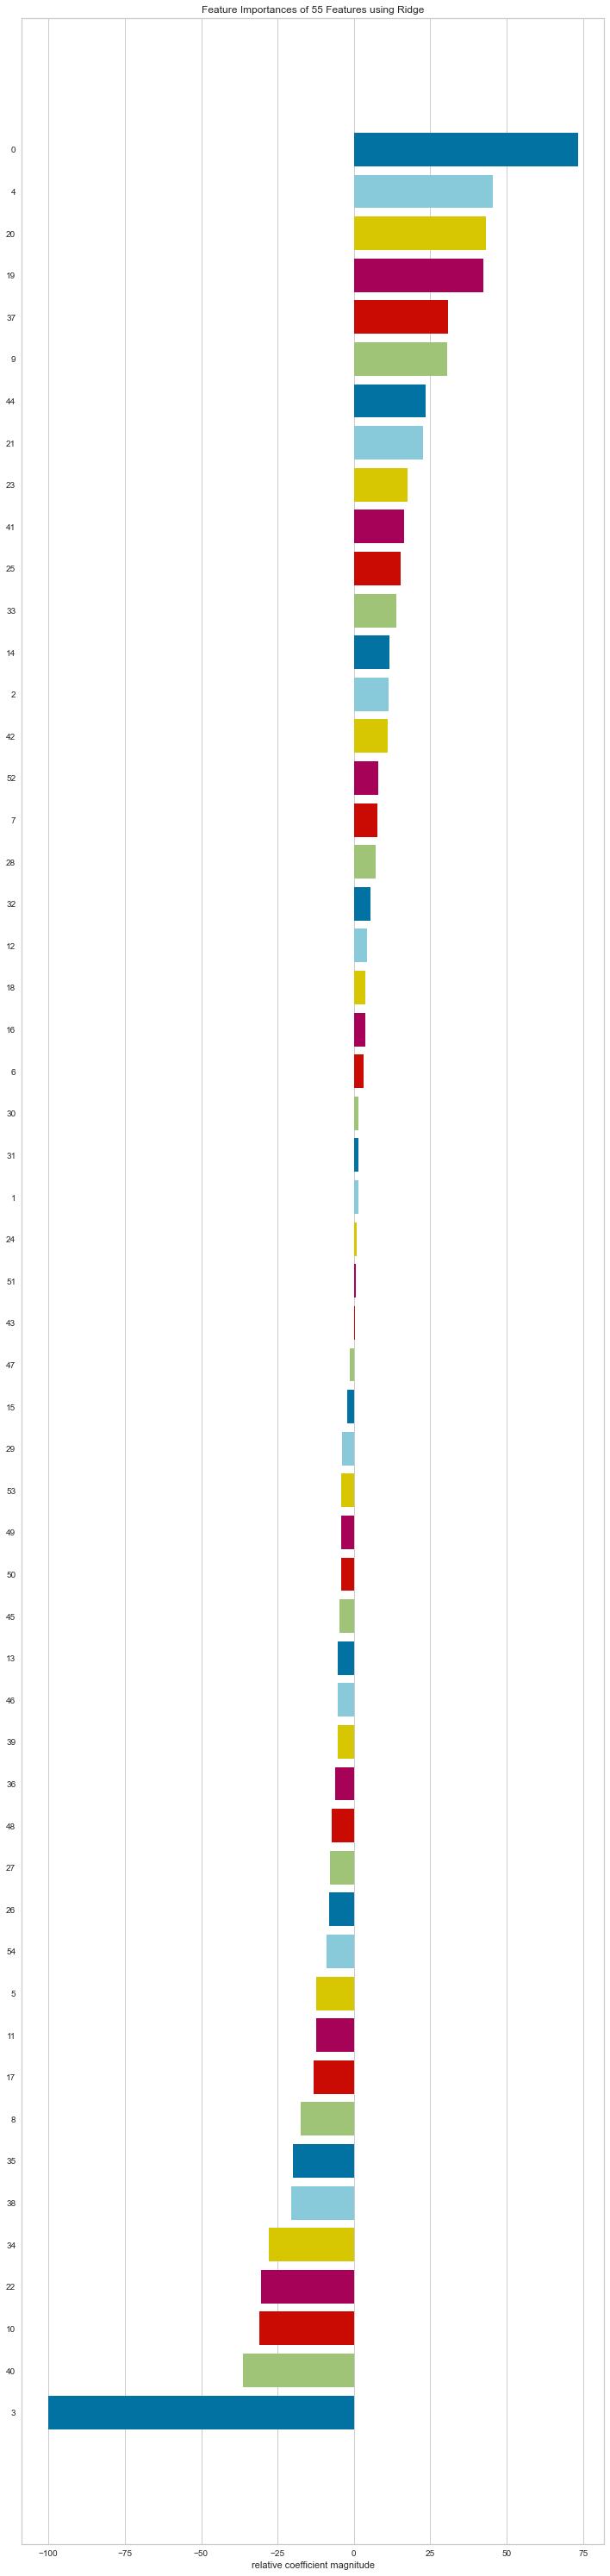

In [281]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.02)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

## Feature importances with Lasso

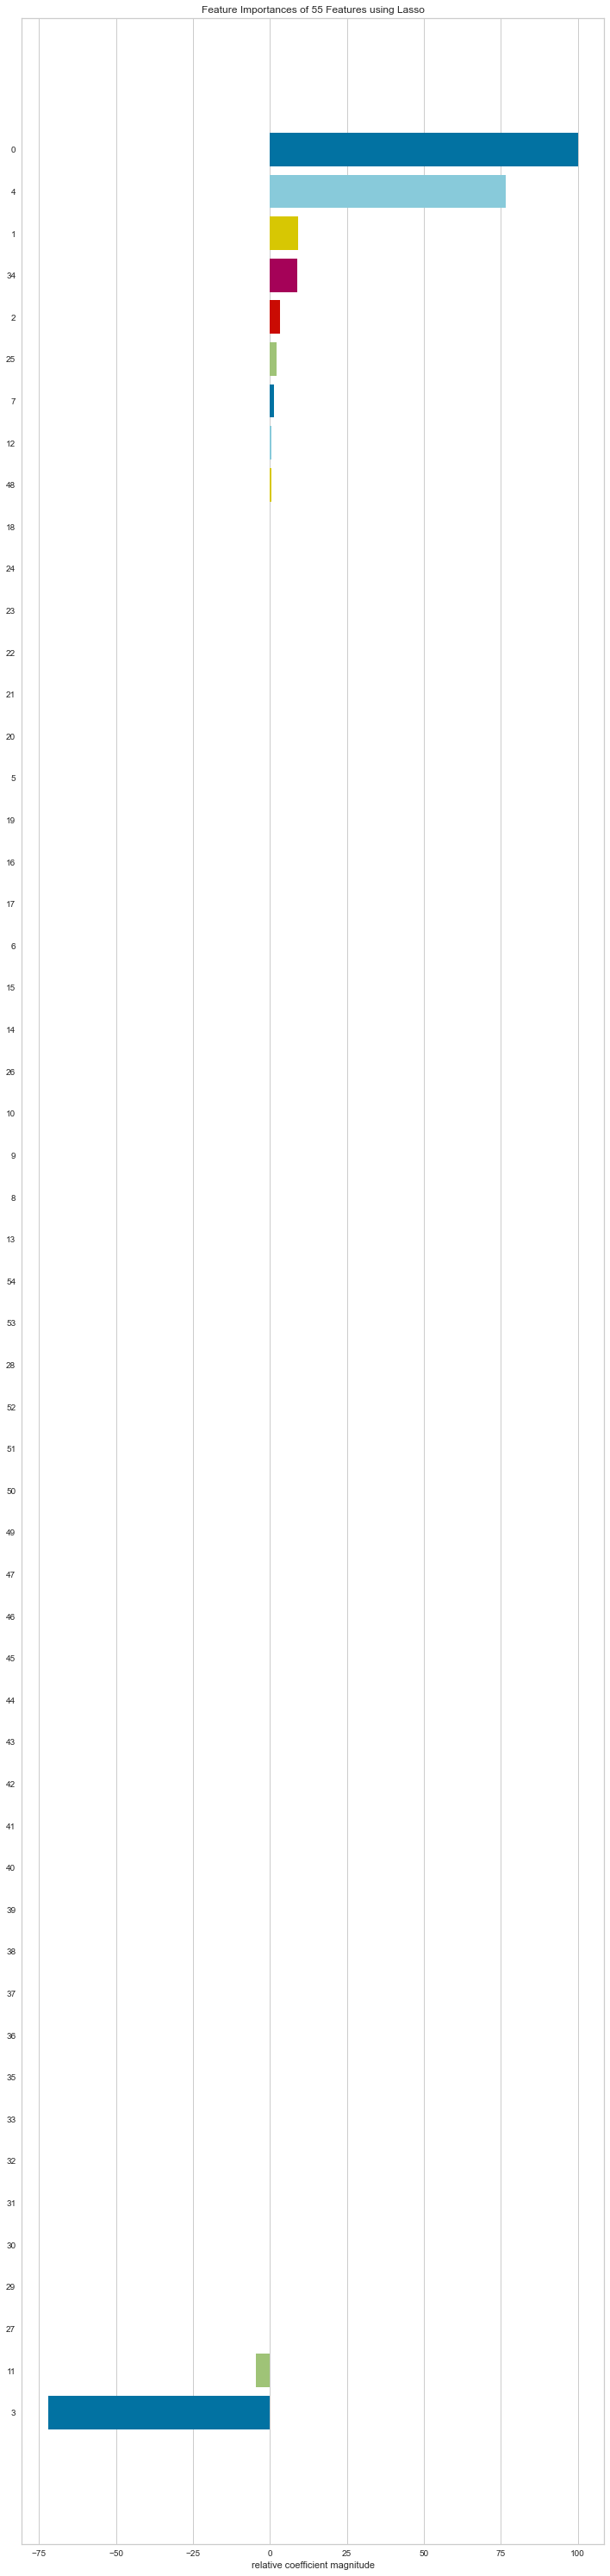

In [282]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

## Feature Selection

In [283]:
X_new = pd.DataFrame(poly_features)[[0, 3, 4]]
X_new

,0,3,4
0,230.1,52946.01,8697.78
1,44.5,1980.25,1748.85
2,17.2,295.84,789.48
3,151.5,22952.25,6256.95
4,180.8,32688.64,1952.64
...,...,...,...
195,38.2,1459.24,141.34
196,94.2,8873.64,461.58
197,177.0,31329.00,1646.10
198,283.6,80428.96,11911.20


In [284]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [285]:
scaler_new = StandardScaler()
X_train_scaled2 = scaler_new.fit_transform(X_train2)
X_test_scaled2 = scaler_new.transform(X_test2)

In [286]:
lasso_model2 = Lasso(alpha=0.01)
lasso_model2.fit(X_train_scaled2, y_train2)

Lasso(alpha=0.01)

In [287]:
y_pred2 = lasso_model2.predict(X_test_scaled2)
y_train_pred2 = lasso_model2.predict(X_train_scaled2)

In [288]:
train_val(y_train2, y_train_pred2, y_test2, y_pred2, "lasso_new")

,lasso_new_train,lasso_new_test
R2,0.982056,0.987284
mae,0.429271,0.515009
mse,0.465402,0.401370
rmse,0.682204,0.633538
